# Foundations of Data Mining: Assignment 1
- Student: Nan Yang(0963123), XiaoLei Wang(0981285)
- Group No: 6

In [1]:
# Global imports and settings
from preamble import *
%matplotlib inline
plt.rcParams['savefig.dpi'] = 120 # Use 300 for PDF, 100 for slides
# InteractiveShell.ast_node_interactivity = "all"
HTML('''<style>html, body{overflow-y: visible !important} .CodeMirror{min-width:105% !important;} .rise-enabled .CodeMirror, .rise-enabled .output_subarea{font-size:140%; line-height:1.2; overflow: visible;} .output_subarea pre{width:110%}</style>''') # For slides

In [2]:
# openML key
oml.config.apikey = '6455db467b30b2fdf1d17d27e33fc28c'

# Handwritten digit recognition

In [3]:
# Load dataset
mnist_data = oml.datasets.get_dataset(554) # Download MNIST data
X, y = mnist_data.get_data(target=mnist_data.default_target_attribute); # Get the predictors X and the labels y

### Evaluate a k-Nearest Neighbor classifier
- Split up the dataset. 60000 samples for training, 10000 samples for testing.
- Calculate predictive accuracy
- Identify misclassifications 

In [4]:
# data set setting only for debug
# Use the first 60,000 examples as the training set and the last 10,000 as the test set

subsetPercent = 1 
X_train,y_train = X[:60000*subsetPercent],y[:60000*subsetPercent]
X_test,y_test = X[60000:],y[60000:]
X_test,y_test = X_test[:len(X_test)*subsetPercent],y_test[:len(y_test)*subsetPercent]

# Here the parameter 'subsetPercent' is used in order to test the programm in a faster 
# mode. We set 'subsetPercent=0.01' at the beginning so that only 1 percent of the data 
# are used and the programm can run faster than using the whole dataset. 
# At last 'subsetPercent = 1' means we are using the full dataset: 60000 training data 
# and 10000 test data.

The Knn predictive accuracy with default setting on test set is: 0.968800 
The Knn predictive accuracy with default setting on training set is: 0.981917 


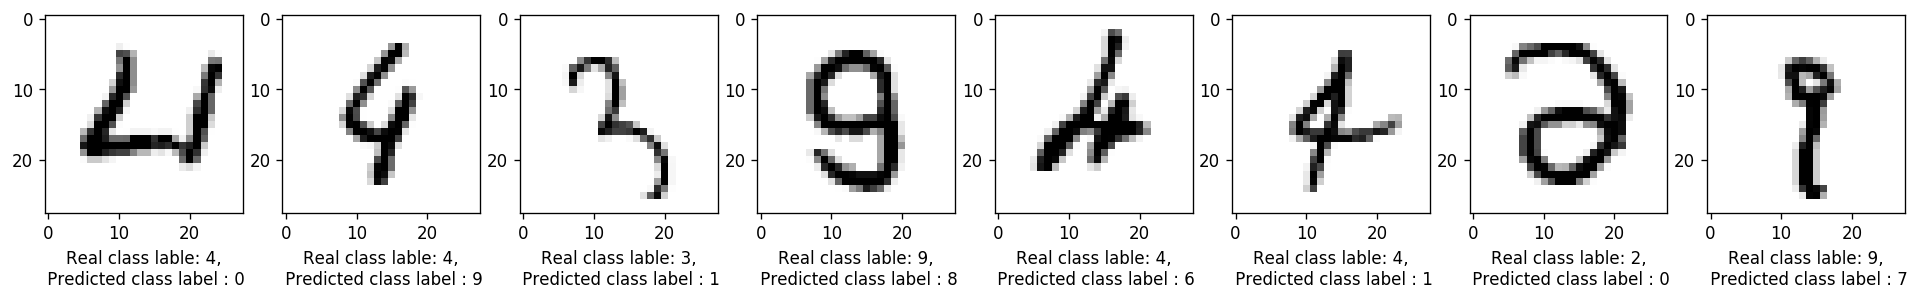

In [5]:
from sklearn import neighbors, linear_model

# Build up a Knn classifier with its default settings
knn = neighbors.KNeighborsClassifier()
# fit train data set
knn.fit(X_train, y_train)
# prediction on test set
pred = knn.predict(X_test)
# predictive accuracy
knn_accuracy_score_test = knn.score(X_test, y_test)
print("The Knn predictive accuracy with default setting on test set is: %f "% knn_accuracy_score_test )
knn_accuracy_score_train = knn.score(X_train, y_train)
print("The Knn predictive accuracy with default setting on training set is: %f "% knn_accuracy_score_train )

# Identify misclassifications and plot five of them
fig, axes = plt.subplots(1, 8, figsize=(20, 5))
ct = 0
# five misclassifications will be plotted
for i  in range(0,1000):
    if(ct<8):
        if(pred[i]!=y_test[i]):    
            # Take several misclassifications, reshape to a 28x28 image and plot
            axes[ct].imshow(X_test[i].reshape(28, 28), cmap=plt.cm.gray_r) 
            axes[ct].set_xlabel("Real class lable: %d,\n Predicted class label : %d" % (y_test[i], pred[i]))
            ct = ct +1
    else:
        break     

For this task, a k-Nearest Neighbor classifier with default settings is built and trained. The predictive accuracy 
on training set is 0.9819, and is 0.9688 on test set, indicating that this knn model works good but just slightly overfit the training set.

Then 10 misclassified digits are plotted with their true labels. The misclassified digits are all because of unstandard
hand writing. Some labels are hard to recognize even for humman, for example the first one.  Some are ambiguous and easy to be misclassified, such as the second one. Some are recognizable for human due to experience, but not for knn model. So if we enlarge the training set, or add more 'unstandard hand writing' digit figure into the training set, the predictive accuracy can be improved.

### Optimize the value for the number of neighbors
- Use 10-fold crossvalidation and plot k against the misclassification rate
- Do 100 bootstrapping repeats


The function $knn\_Ktest$ defined below is used to perform 10-fold cross validation or bootstrapping over a range of K. The parameter $mode$ can be "CV" or " Bootstrap". The CV mode just conducts 10-fold cross validation. The bootstrap mode will sample data points with replacement and interate the procedure 100 times.

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn import neighbors
# define a function to perform 10-fold cross validation over a range of K 
def knn_Ktest(X_data,y_target,k_range,mode):
    # empty list that will hold cv scores
    cv_scores = []
    # choose spliter
    if(mode =="CV"):
        spl = StratifiedShuffleSplit(n_splits=10, random_state=0)
    elif (mode == "Bootstrap"):
        spl = ShuffleSplit(n_splits=100, random_state=0, train_size = 0.66, test_size = 0.34)
    else:
        print("wrong mode argument")
        return []                  
    for k in k_range:
        knn =neighbors.KNeighborsClassifier(n_neighbors=k)
         # perform 10-fold cross validation
        scores = cross_val_score(knn, X_data, y_target, cv=spl, scoring='accuracy',n_jobs=-1)
        cv_scores.append(scores.mean())
    # transfer to misclassification error
    MisErr = [1 - x for x in cv_scores]
    return MisErr

Only 10% stratified subsample is used in the following experiment. The method $train\_test\_split$ with configuration of $stratify$ is adopted here to extract a stratified subsample.

In [32]:
# data setting, now we use only 10% stratified subsample
from sklearn.model_selection import train_test_split

take_out =0.1
x_sample,_,y_sample,_ = train_test_split(X, y, random_state=0,train_size =take_out,stratify = y)
# split subsample data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(x_sample, y_sample, 
                                                    random_state=0,test_size =.1,stratify = y_sample)

10-fold cross validation and bootstrapping are performed below. And a misclassification error with respect to neighbor K is plotted.

CV: the optimal number of neighbors is 3
CV: the optimal score is 0.940476
CV: the score of prediction of the test set with k = 3 is :0.930
Bootstrap: the optimal number of neighbors is 3
Bootstrap: the optimal score is 0.929118
Bootstrap: the score of prediction of the test set with k = 3 is :0.930


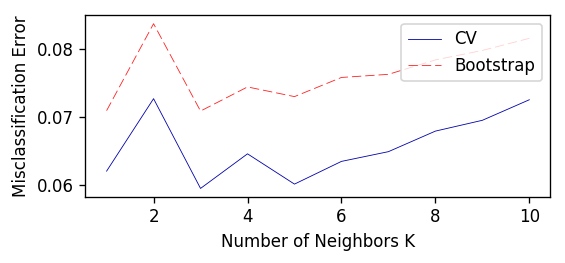

In [6]:
# number of neighbors
num_neighbors = range(1,11)
plt.figure(figsize = (5,2))
for method in ['CV','Bootstrap']:   
    # perform CV
    MisErr = knn_Ktest(X_train,y_train,num_neighbors,method)

    # determining best k
    optimal_k = num_neighbors[MisErr.index(min(MisErr))]
    print ("%s: the optimal number of neighbors is %d" % (method , optimal_k))
    print ("%s: the optimal score is %f" % (method, 1- min(MisErr)))

    # plot misclassification error vs k
    plt.plot(num_neighbors, MisErr, label = method)  
    
    # use the optimal k to predict test set
    knn =neighbors.KNeighborsClassifier(n_neighbors=optimal_k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    scoreForK = knn.score(X_test,y_test)
    print("%s: the score of prediction of the test set with k = %d is :%.3f" %(method,optimal_k,scoreForK))
    
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.legend(loc="upper right")
plt.show()



   For this task, the misclassification error with different neighbors K is estimated by two methods: 10-fold cross validation and 100 bootstrapping repeats, and the results are visualized in above figure. As is shown above, with different values of K, the misclassification error shows the same trend when using CV and Bootstrapping. And the minimum error is reached when neighbors k is 3 in both two curves. In general, 10-fold cross validation has better performance than 100 Bootstrapping repeats. One reason is the different properties of two methods: CV tends to be less biased but large variance with different training set for each fold; However, bootstrapping tends to drastically reduce the variance but gives more biased results, so it tends to be more pessimistic. Besides, 10-fold cross validation in our method uses 90% of total train_validation data as training set, yet bootstrapping only uses 2/3 of it as training set, it is reasonable that 10-fold cross validation could train a better model with lower misclassification error.

### Compare kNN against the linear classification models
   First we use the default hyperparameter settings to train a SVM model and logistic regression model.

In [7]:
# data setting, now we use only 1% stratified subsample for grid search
take_out =0.01
x_sample2,_,y_sample2,_ = train_test_split(X, y, random_state=0,train_size =take_out,stratify = y)
# split subsample data into train set and test set
X_train2, X_test2, y_train2, y_test2 = train_test_split(x_sample2, y_sample2, random_state=0,
                                                        test_size =.1,stratify = y_sample2)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

for model, modelStr in zip([LinearSVC(), LogisticRegression()],["Linear SVC","Logistic regression"]):
    clf = model.fit(X_train2, y_train2)
    print("The training set score of %s is: %.4f" % (modelStr, clf.score(X_train2, y_train2)))
    print("The testing set score of %s is: %.4f" % (modelStr, clf.score(X_test2, y_test2)))

The training set score of Linear SVC is: 1.0000
The testing set score of Linear SVC is: 0.8143
The training set score of Logistic regression is: 1.0000
The testing set score of Logistic regression is: 0.8286


We could find that with the default hyperarameter settings, both linear SVMs model and logistic regression model is overfitting on training set. 

Next, we optimize for the degree of regularization ( C ) and penalty ( L1/L2 ) for Logic regression and linear SVM. 
Grid search and 10-fold cross validation is used. The results are visualzied with a heat map.

Linear SVC :
 Best parameters: {'penalty': 'l1', 'C': 0.001}
 Best cross-validation score: 0.8302
Use the best parameters to do the test:
The test result is: 0.8714

Logistic regression :
 Best parameters: {'penalty': 'l2', 'C': 0.01}
 Best cross-validation score: 0.8238
Use the best parameters to do the test:
The test result is: 0.8429



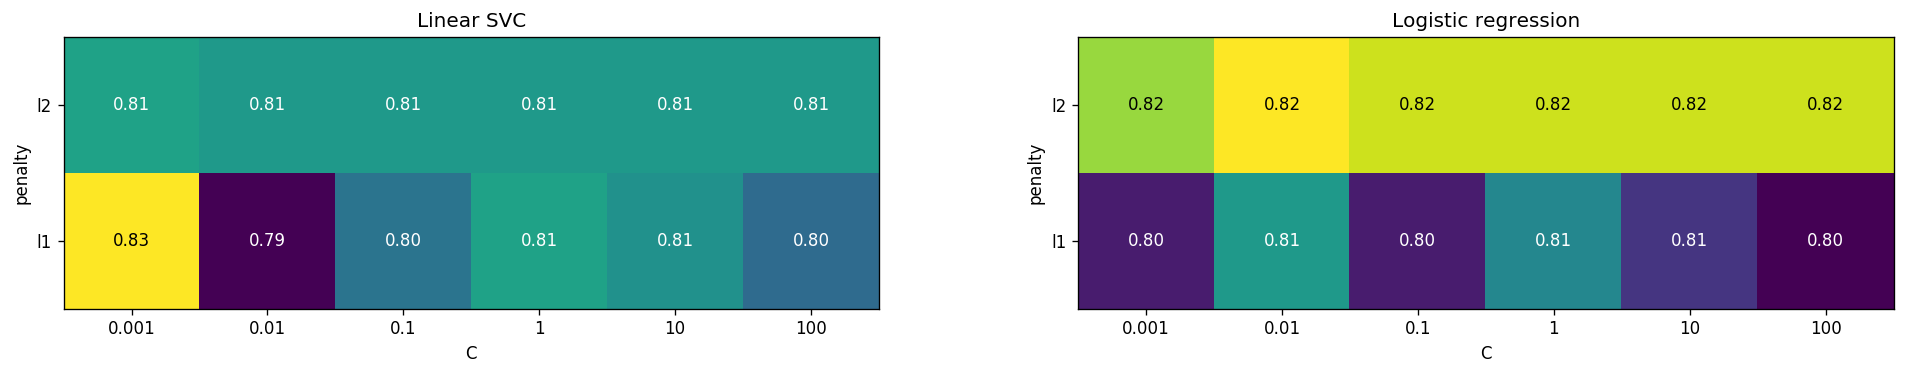

In [9]:
from sklearn.model_selection import GridSearchCV 
import pandas as pd
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'penalty':['l1','l2']}
fig, axes = plt.subplots(1, 2,  figsize=(20, 3))
for model, modelStr,ax in zip([LinearSVC(dual=False), LogisticRegression(dual=False)],
                              ["Linear SVC","Logistic regression"],axes):
    grid_search = GridSearchCV(model, param_grid, cv=10)
    grid_search.fit(X_train2, y_train2)
    print("%s :" % modelStr)
    print(" Best parameters: %s" %(grid_search.best_params_))
    print(" Best cross-validation score: %.4f" %(grid_search.best_score_))  
    # convert to Dataframe
    results = pd.DataFrame(grid_search.cv_results_)
    scores = np.array(results.mean_test_score).reshape(6, 2)
    # plot the mean cross-validation scores
    ax.set_title(modelStr)
    mglearn.tools.heatmap(np.transpose(scores),
                          ax=ax, xlabel='C', xticklabels=param_grid['C'],
                          ylabel='penalty', yticklabels=param_grid['penalty'], cmap="viridis") 
    print("Use the best parameters to do the test:")
    best_model = grid_search.best_estimator_
    best_model.fit(X_train2, y_train2)
    print("The test result is: %.4f" % (best_model.score(X_test2,y_test2)))
    print("")

From the result above, we can find out that the best formance estimator for this subsample dataset is LinearSVC with C = 0.001 and  penalty = 'l1'. Next step, we use this estimator to compete with optimized Knn model we selected before, with same train set and test set.

In [12]:
clf = LinearSVC(C=0.001, penalty='l1', random_state=0,dual = False)
clf.fit(X_train, y_train)
print("The best LinearSVC estimator leads to score %.4f" % clf.score(X_test,y_test))

The best LinearSVC estimator leads to score 0.9043


   The best LinearSVC estimator obtains score 0.9043, which is still lower than score 0.930 achieved by the optimized Knn estimator, so in our case Knn is a better choice. Consider the property of Knn and SVM: Knn tends to give good performance when a lot of points in a low dimensional space are trained, while SVM tends to perform better when a few points in a high dimensional space are trained. Our training set has a shape of (6300,784), the number of data points is much higher dimension, which might be the reason why Knn gives higher accuracy in this case.

#  Model selection 

### Optimize a RandomForest 

In [69]:
ionosphere = oml.datasets.get_dataset(59) # Download Ionosphere data
# Get the predictors X and the labels y
X, y = ionosphere.get_data(target=ionosphere.default_target_attribute); 

Now we create a nested cross validation for the dataset. 

Our settings are:
- max_features: a range from 0 to the total number of features
- n_estimators: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
- spliter: $StratifiedShuffleSplit$ and 5 folds for both outer loop and inner loop
- scoring approach : $roc\_auc$ 

We understand that the each fold of outer loop is used for evaluating the performance of the best parameter set chosen by the inner loop. Therefore, we calculate average value for the outer loop score and use $GridSearchCV$ to find the best parameter set and its corresponding AUC score. Besides that, we also use $time$ function to record time consumption on the nested cross validation.

In [75]:
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
import time

# percentage of data for debugging
x_data = X[:int(len(X)*1)]
y_data = y[:int(len(y)*1)]
(_,numberOfFeature) = X.shape
# parameters setting
param_grid ={'max_features': list(range(1,numberOfFeature+1)), 
             'n_estimators': [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]}
# choose a stratified spliter for outer loop and inner loop
spl = StratifiedShuffleSplit(n_splits=5, random_state=0)

# grid search time recording
tic=time.clock()
# nested cross validation
grid = GridSearchCV(RandomForestClassifier(), param_grid, n_jobs =-1, scoring="roc_auc", cv=spl)
scores = cross_val_score(grid, x_data, y_data, scoring="roc_auc", cv=spl)
toc=time.clock()

mean_score = scores.mean()
print("The mean AUC score with nested cross validation is: %.3f"% mean_score)

grid.fit(x_data, y_data)
print("Grid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC): %.3f" %(grid.best_score_))
print("The processing time of the nested CV is:%.4f seconds."%(toc-tic))


The mean AUC score with nested cross validation is: 0.977
Grid-Search with AUC
Best parameters: {'max_features': 3, 'n_estimators': 32}
Best cross-validation score (AUC): 0.986
The processing time of the nested CV is:458.4628 seconds.


This program runs on a laptop with 8 Intel(R) i7 CPUs, requiring 458 seconds for the nested cross validation. 
The running time will be drastically increase when n_estimators is higher. 

### Visualize the grid search result

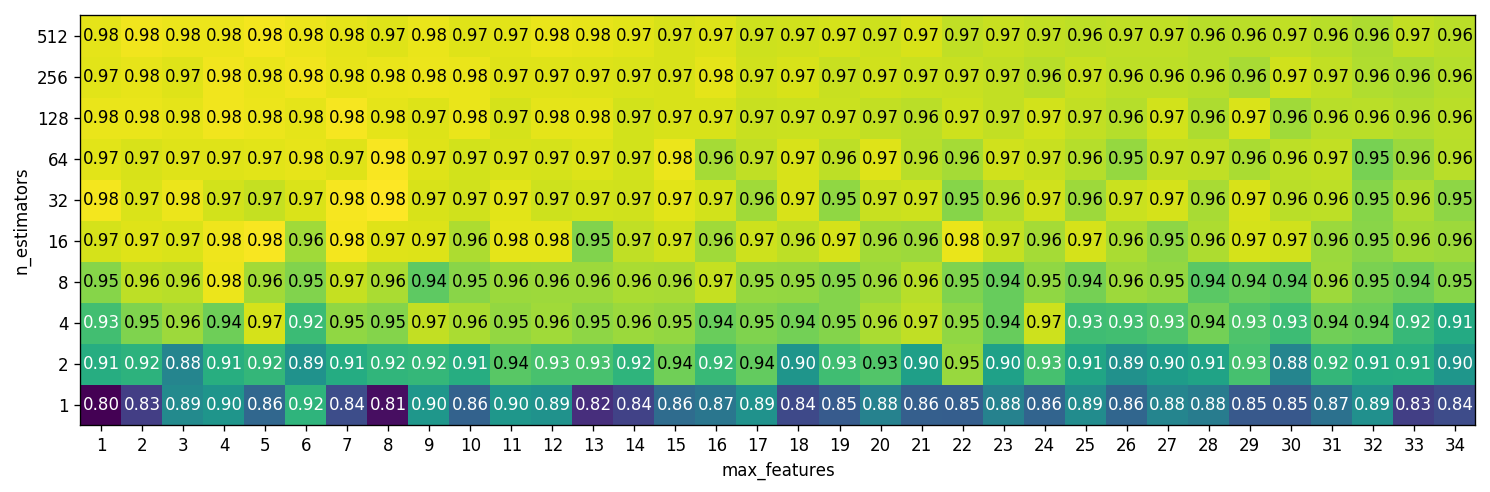

In [73]:
# Visualization
result = pd.DataFrame(grid.cv_results_)
scores = np.array(result.mean_test_score).reshape(len(param_grid['max_features']),len(param_grid['n_estimators']))
# set figure size
plt.figure(figsize=(15,10))
# plot the mean cross-validation scores
mglearn.tools.heatmap(np.transpose(scores), ylabel='n_estimators', yticklabels=param_grid['n_estimators'],
                     xlabel='max_features', xticklabels=param_grid['max_features'], cmap="viridis");


The best AUC is found when $n\_estimators=32$ and $max\_features=8$. The heat map shows interesting property of random forest with varying number of $n\_estimators$ and $max\_features$. For a fixed value of max_features, higher $n\_estimators$ always helps to give a higher AUC value, this is because more trees can lead to more smoothing and higher accuracy of the model. However, for a fixed value of $n\_estimators$ larger than 2, the increasing of value $max\_features$ tends to decrease the accuracy of the model. This is reasonable because considering more features means increasing complexity of the model, the accuracy is interfered by the unessential features due to overfitting. In general, the combination of low $max\_features$ and high $n\_estimators$ yields a more smoothing and better Random Forest model.

# Decision tree heuristics

In [4]:
import pandas as pd 

df = pd.DataFrame({"Sky":['sunny','sunny','rainy','sunny','sunny'],
                   "AirTemp":['warm','warm','warm','cold','warm'],
                   "Humidity":['normal','high','high','high','normal'],
                   "Wind":['strong','strong','strong','strong','weak'],
                   "Water":['warm','warm','cool','warm','warm'],
                   "Forecast":['same','same','change','change','same'],
                   "Date?":['yes','yes','no','yes','no']
                   });
df = df[['Sky', 'AirTemp', 'Humidity', 'Wind', 'Water', 'Forecast', 'Date?']] # Fix column ordering
df

,Sky,AirTemp,Humidity,Wind,Water,Forecast,Date?
0,sunny,warm,normal,strong,warm,same,yes
1,sunny,warm,high,strong,warm,same,yes
2,rainy,warm,high,strong,cool,change,no
3,sunny,cold,high,strong,warm,change,yes
4,sunny,warm,normal,weak,warm,same,no


$entropy$ function and $info\_gain$ function are implemented below.

In [5]:
import numpy as np

# pos: number of positive elements
# neg: number of negative elements
def entropy(pos, neg):
    Entropy = 0
    p = float(pos/(pos+neg))
    n = float(neg/(pos+neg))
    for i in [p,n]:
        if(i!=0):
            Entropy = Entropy - i*np.log2(i)
    return Entropy

def info_gain(pos1,neg1,pos2,neg2):
    entropyLeft = entropy(pos1,neg1)
    entropyRight = entropy(pos2,neg2)
    entropyParent = entropy(pos1+pos2,neg1+neg2)
    total  = pos1+pos2+neg1+neg2
    weightLeft = float((pos1+neg1)/total)
    weightRight =float((pos2+neg2)/total)
    infoGain = entropyParent - weightLeft*entropyLeft - weightRight*entropyRight
    return infoGain
# for test: 
#left node has 1 positive elements and 0 negative elements. 
# right node has 0 positive elements and 1 negative elements
info_gain(1,0,0,1)

1.0

In [6]:
# The entropy of whole dataset
# First we conunt atrribute Date? value
ynCount = pd.value_counts(df['Date?'])
# Pass number of positive elements and negtive elements to func entropy
e = entropy(ynCount['yes'], ynCount['no'])
# Calculate information gain using water feature to split up data
# using water feature, we can split up data into two groups 
warmCount = pd.value_counts(df['Date?'][df['Water']=='warm'])
coolCount =  pd.value_counts(df['Date?'][df['Water']=='cool'])
# count number of elements of each class for two groups
pos1,neg1 = (warmCount['yes'] if hasattr(warmCount,'yes') else 0),(warmCount['no'] if hasattr(warmCount,'no') else 0)
pos2,neg2 = (coolCount['yes'] if hasattr(coolCount,'yes') else 0),(coolCount['no'] if hasattr(coolCount,'no') else 0)
# pass parameter to func info_gain
i = info_gain(pos1, neg1,pos2,neg2)
print("The entropy for whole dataset is: %.3f" % e)
print("The information gain using water feature is: %.3f" % i)

The entropy for whole dataset is: 0.971
The information gain using water feature is: 0.322


For implementaion of a decision free classifier, We create a function $divideDataSet$ to split dataset into two sets:
- feature: the feature want to split on
- value: a value of the feature, a sample with this value will be distributed to leftset 
- dataset: the input dataset

In [12]:
def divideDataSet(feature, value, dataset):
    leftset =dataset[dataset[feature]==value].drop(feature, 1).reset_index(drop=True)
    rightset =dataset[dataset[feature]!=value].drop(feature, 1).reset_index(drop=True)
    return leftset, rightset

# for test, split on Humidity
s1,s2 = divideDataSet('Humidity','high',df)
print(s1)
print(s2)

     Sky AirTemp    Wind Water Forecast Date?
0  sunny    warm  strong  warm     same   yes
1  rainy    warm  strong  cool   change    no
2  sunny    cold  strong  warm   change   yes
     Sky AirTemp    Wind Water Forecast Date?
0  sunny    warm  strong  warm     same   yes
1  sunny    warm    weak  warm     same    no


The $decisionNode$ class defined below is for representation of a node.
- best_criteria: the best attribute to split on
- results: two dataset produced by spliting on best_criteria
- pb: positive branch
- np: negative branch

In [13]:
class decisionNode:
    def __init__(self, best_criteria=None, results = None, pb=None, nb=None):
        self.best_criteria=best_criteria
        self.results=results
        self.pb=pb
        self.nb=nb
   

Here is the function to build decision tree. It is an recursive function. 

In [14]:
def buildTree(dataset,resultAttr):
    # number of features
    numOfColumns = len(dataset.columns)
    # initialize variables
    best_gain=0.0
    best_criteria=None
    best_sets=None
    # go over each features in dataset
    for i in range(numOfColumns-1):
        # get attribute
        attribute =dataset.keys()[i]
        # use this attribute to split data
        s1,s2 = divideDataSet(attribute,dataset[attribute][0],dataset)
        if len(s1)>0 and len(s2)>0:
            s1count = pd.value_counts(s1[resultAttr])
            s2count =  pd.value_counts(s2[resultAttr])
            # count number of elements of each class for two groups
            pos1,neg1 = (s1count['yes'] if hasattr(s1count,'yes') else 0),
                        (s1count['no'] if hasattr(s1count,'no') else 0)
            pos2,neg2 = (s2count['yes'] if hasattr(s2count,'yes') else 0),
                        (s2count['no'] if hasattr(s2count,'no') else 0)
            # calculate information gain
            gain = info_gain(pos1, neg1, pos2, neg2)          
            if gain > best_gain and len(s1)>0 and len(s2)>0: #set must not be empty
                best_gain = gain
                best_criteria = attribute
                best_sets = (s1,s2)              
    
    if best_gain>0: # not reach leaf yet, continute to split data
        if(len(best_sets[0])>0):     
            postiveBranch = buildTree(best_sets[0],resultAttr)
        if(len(best_sets[1])>0):    
            negtiveBranch = buildTree(best_sets[1],resultAttr)         
        n = decisionNode(best_criteria=best_criteria,pb=postiveBranch,nb=negtiveBranch,
                         results=(best_sets[0],best_sets[1]))
        return n
    else: # reach leaf
        n =  decisionNode(results=(s1,s2))
        return n    

A function $printNode$ is defined to print the representation of nodes and leafs.

In [15]:
def printNode(tree):
    if(tree.best_criteria!=None):
        print("The best attribute to split on is: %s" % tree.best_criteria)
        print("Left dataset is :" )
        print(tree.results[0])
        print("Right dataset is :" )
        print(tree.results[1])
        print("")
        if(tree.pb!=None):
            print("POSITIVE BRANCH")
            printNode(tree.pb)
        if(tree.nb!=None):
            print("NEGATIVE BRANCH")
            printNode(tree.nb)
    else:
        print("A leaf is reached")
       

Test on dating example.

In [16]:
tree = buildTree(df,"Date?")        
printNode(tree)

The best attribute to split on is: Sky
Left dataset is :
  AirTemp Humidity    Wind Water Forecast Date?
0    warm   normal  strong  warm     same   yes
1    warm     high  strong  warm     same   yes
2    cold     high  strong  warm   change   yes
3    warm   normal    weak  warm     same    no
Right dataset is :
  AirTemp Humidity    Wind Water Forecast Date?
0    warm     high  strong  cool   change    no

POSITIVE BRANCH
The best attribute to split on is: Wind
Left dataset is :
  AirTemp Humidity Water Forecast Date?
0    warm   normal  warm     same   yes
1    warm     high  warm     same   yes
2    cold     high  warm   change   yes
Right dataset is :
  AirTemp Humidity Water Forecast Date?
0    warm   normal  warm     same    no

POSITIVE BRANCH
A leaf is reached
NEGATIVE BRANCH
A leaf is reached
NEGATIVE BRANCH
A leaf is reached


As showed above,  our tree builder first split on feature "SKy" which is the leftmost feature among all the best splits. After this spliting, one branch reach leaf, another branch further split data on feature "Wind". All the data is classfied into two states(yes or no) after these two splits.

Now we use sklearn to build a decision tree. Since sklearn does not support to use strings as feature values, a conversion from string to numerical value is required. Here we use $LabelEncoder$ to do the conversion.

In [7]:
from IPython.core.display import display
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# convert string value to numerical value
Xsample = []
for i in list(range(0,6)):
    Xsample =  np.append(Xsample,le.fit_transform(df.values[:,i]))
Xsample = Xsample.reshape(-1,5).transpose()
Ysamples = le.fit_transform(df.values[:,6]).transpose()

After conversion, we use sklearn $DecisionTreeClassifier$ to build a tree for the same dataset. 

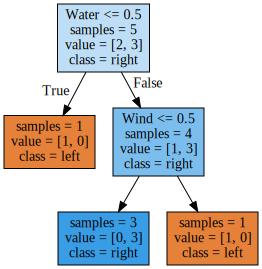

In [8]:
tree = DecisionTreeClassifier(random_state=0,criterion ='entropy')
tree.fit(Xsample,Ysamples)
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["left", "right"], 
                feature_names=df.columns[:6], impurity=False, filled=True)
# Open and display
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


The visualization of this built tree is showed above. Here we can found that the DecisionTreeClassifier use "Water" as the first best attribute, which is different from the result given by our tree builder beacuse scikit DecisionTreeClassifier use rightmost feature when there are multiple features can provide best split, while our tree builder adopt the leftmost method. After splitting on feature "Water", the tree grows two branches downwards. Left branch reach the leaf while right branch is spliited on feature "Wind", which is same to our tree. After spliiting on feature "Wind", the dataset is completedly classified and the tree reaches the buttom.

# Random forest

In [3]:
# Download data
eeg = oml.datasets.get_dataset(1471) # Download Ionosphere data
X, y = eeg.get_data(target=eeg.default_target_attribute);
x_data = X[:int(len(X)*1)]
y_data = y[:int(len(y)*1)]

### OOB error rate investigation

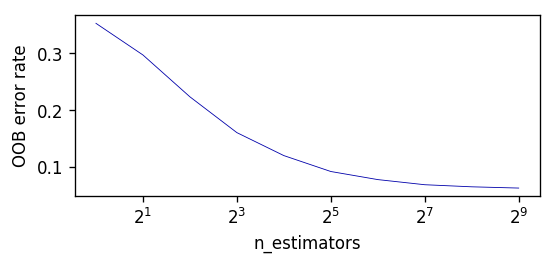

In [4]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(warm_start=True, oob_score=True,random_state=0)
n_estimators= [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
error_rate = []
for i in n_estimators:
    clf.set_params(n_estimators=i)
    clf.fit(x_data, y_data)
    # Record the OOB error for each `n_estimators=i` setting.
    oob_error = 1 - clf.oob_score_
    error_rate.append((i,oob_error))
    
# Generate the "OOB error rate" vs. "n_estimators" plot.
xs, ys = zip(*error_rate)
plt.figure(figsize=(5,2))
plt.plot(xs,ys)
plt.xscale('log',basex=2)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()


We can observe from the figure above that the OOB error rate become stable at 0.075 when $n\_estimators$ is more than 128. 
Next step, the cross validation estimation is conducted.

### OOB estimation vs CV estimation

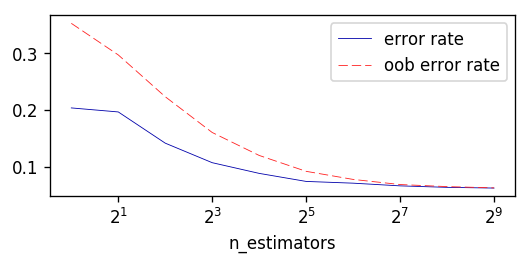

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

# set up n_estimators
param_grid= {'n_estimators':[1, 2, 4, 8, 16, 32, 64, 128, 256, 512]}
# choose a stratified spliter for outer loop and inner loop
spl = StratifiedShuffleSplit(n_splits=10, random_state=0)
# create a grid_search
grid = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, n_jobs =-1, cv=spl)
# fit dataset
grid.fit(x_data, y_data)
# calculate mean test error
mean_test_error = 1- grid.cv_results_['mean_test_score']

# plotting
plt.figure(figsize=(5,2))
# Generate the " error rate" vs. "n_estimators" plot.
xss = param_grid['n_estimators']
plt.plot(xss, mean_test_error,label ='error rate')
# Combine with "oob error rate" vs "n_estimators" plot for comparison.
plt.plot(xs, ys,label = "oob error rate")

plt.xscale('log',basex=2)
plt.xlabel("n_estimators")
plt.legend(loc="upper right")
plt.show()


From the figure above we can observe that both oob estimation approach and cv estimiation approach tend to be stable at error rate of around 0.075 when $n\_estimators$ is more than 128.

However, when $n\_estimators$ is smaller than 128, the oob error rate seems more pessimistic compared to error rate. In our view the  reason why OOBE is a more pessimistic estimation of forest's error is because it usually trains by a smaller number of samples(66%) than usually done with 10-fold cross-validation(90%). As number of estimators increases, the gap between curves is reduced. 

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

print("Random forest : \nGrid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC): %.3f" %(grid.best_score_))
print("")
# create a decision tree 
tree = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(tree, x_data, y_data, scoring="roc_auc", cv=spl)
print("Decision tree classifier: ")
print("score (AUC) on test set: {:.3f}".format(scores.mean()))

Random forest : 
Grid-Search with AUC
Best parameters: {'n_estimators': 512}
Best cross-validation score (AUC): 0.937

Decision tree classifier: 
score (AUC) on test set: 0.836


From the result showed above, we can observe that random forest classifer can perform better than single desicion tree classfier.
Next, we calculate the variance and bias for both of results. 

### Bias and variance
The implementation of bias calculation and variance calculation are presented below. Misclassificatin ratio,class prediction ratio and occuring ratio for each data point are reuqired to be calculated.

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ShuffleSplit

def biasAndVariance(x_data,y_data,classifier):
    spl = ShuffleSplit(n_splits=100, random_state=0,train_size = 0.66, test_size = 0.34)
    # initialization
    misList =[]
    app = np.zeros(len(x_data))
    missRato = np.zeros(len(x_data))
    occRatio = np.zeros(len(x_data))
    numOfErr = np.zeros(len(x_data))
    dataIndex = range(len(x_data))      
    numOfPostivePredict =  np.zeros(len(x_data))
    numOfNegativePredict = np.zeros(len(x_data))   
    # do bootstrapping
    for train_index, test_index in spl.split(x_data):
        # get train data and test data for each iteration
        x_train,y_train = x_data[train_index],y_data[train_index]
        x_test,y_test = x_data[test_index],y_data[test_index]
        # record the appearance of each data points    
        app[test_index] = app[test_index]+1
        # create a decision tree classifier
        clf = classifier
        # fit train data
        clf.fit(x_train,y_train)
        # do prediction
        pred  = clf.predict(x_test)
         # record misclassfication
        PredictResult = [i for i in range(len(pred)) if pred[i] != y_test[i]]
        numOfErr[test_index[PredictResult]] = numOfErr[test_index[PredictResult]] + 1
        # record classification result
        postivePredict = [i for i in range(len(pred)) if pred[i] == 1]    
        negativePredict = [i for i in range(len(pred)) if pred[i] == 0] 
        numOfPostivePredict[test_index[postivePredict]] = numOfPostivePredict[test_index[postivePredict]] +1
        numOfNegativePredict[test_index[negativePredict]] = numOfNegativePredict[test_index[negativePredict]] +1
    # calculate the ratio of class positive and negative predictions ->p(class)
    pRatio = numOfPostivePredict/app
    nRatio = numOfNegativePredict/app
    # calculate the variance for every data point -> variance(x)
    varPoint = [(1-(pRatio[i]**2+nRatio[i]**2))/2 for i in dataIndex ]
    # calculate misclassification ratio for each data point ->Bias(x)
    missRato= numOfErr/app
    # calculate occuring ratio for each data point -> wx
    occRatio= app/100
    varResult = 0
    biasResult = 0
    for i in dataIndex:
        varResult = varResult+ varPoint[i]*occRatio[i]
        biasResult = biasResult+ (missRato[i]**2)*occRatio[i]
    return biasResult,varResult

In [16]:
dtBiasResult,dtVarResult = biasAndVariance(x_data,y_data,DecisionTreeClassifier(random_state=0))
rfBiasResult,rfVarResult = biasAndVariance(x_data,y_data,RandomForestClassifier(random_state=0,n_estimators=128))
print("The bias and variance of decision tree are : %.4f, %.4f" % (dtBiasResult,dtVarResult))
print("The bias and variance of random forest are : %.4f, %.4f " % (rfBiasResult,rfVarResult))

The bias and variance of decision tree are : 335.6460, 550.2140
The bias and variance of random forest are : 286.6032, 101.3868 


From the bias calculations result presented above, we observe that both decision tree and random forest lead to low bias. Compared to decision tree classifier, the random tree classfier provides a lower bias with using 128 estimators.

However, the variance calculation result shows a huge difference between these two classfiers. The random forest classifier provide much lower variance, which meets our expectation. The decision tree can provide good bias for classification, while it is easy to overfit(high variance). In contrast, random forests take a bunch of decision trees and adopt soft vote to reduce variance. It selects a random subset of features when splitting to reduce the correlation between the trees which leads to extra lower variance.

### Bias and variance vs n_estimators
Next step, we adjust the number of trees for random forest classifier.

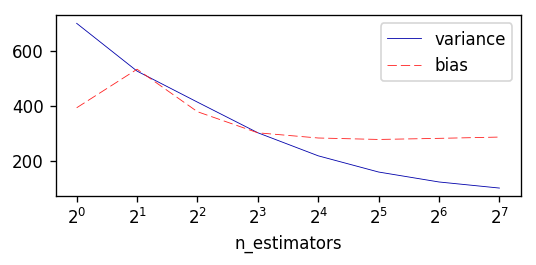

In [27]:
biasList = []
varList = []
n_est = [1,2,4,8,16,32,64,128]
for i in n_est:
    b,var = biasAndVariance(x_data,y_data,RandomForestClassifier(random_state=0,n_estimators=i))
    biasList.append(b)
    varList.append(var)
    #print("The bias of random forest(n_estimators= %d) is : %.4f" %(i,b))

plt.figure(figsize=(5,2))
plt.plot(n_est, varList,label ="variance" )
plt.plot(n_est, biasList,label ="bias")
plt.xscale('log',basex=2)
plt.xlabel("n_estimators")
plt.legend(loc="upper right")
plt.show()

The relationship between the number of trees and variance can be found in figure showed above. The variance can be significantly reduced by increasing the number of trees though more trees requires more time to build forest. It is a trade-off between variance and processing time. Noteworthy, the results will stop getting significantly better beyond a critical number of trees. Therefore, we can choose a $n\_estimators$ with reasonable performace while still obtaining a fast trainning.

The bias first increases when we adjust $n\_estimators$ from one to two. The curve goes down when the number of trees is further increased, and stablizes after reaching the point of $n\_estimators = 16$. Generally, both variance and bias benefit from increasing the number of trees with different degree. 

## A regression benchmark

- Take a selection of the algorithms
- Make educated guesses about good hyperparameter values and set up a grid or random search.
- Evaluate all models with 10-fold cross-validation and root mean squared error (RMSE). Report all results. Which model yields the best results?

In [76]:
liver = oml.datasets.get_dataset(8) # Download Liver-disorders data
X, y = liver.get_data(target=liver.default_target_attribute);

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# split data into training_valid set and test set
X_traval, X_test, y_traval, y_test = train_test_split(X, y, train_size=0.9,test_size=0.1, random_state=0)

# Regression: Ridge, Lasso, KNeighborsRegressor
param_grid1 = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
param_grid2 = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100],'max_iter':[1, 10, 100, 1000, 10000, 100000]}
param_grid3 = {'n_neighbors': [1,3,5,7,11,15,17,19,21,23,25,27,29,31,33,35]}


for rmodel,param_grid,name_model in zip([Ridge(), Lasso(), KNeighborsRegressor()],
                                        [param_grid1,param_grid2,param_grid3],
                                        ['Ridge', 'Lasso', 'KNeighborsRegressor']):
    grid_search = GridSearchCV(rmodel, param_grid, scoring="neg_mean_squared_error", cv=10)
    grid_search.fit(X_traval, y_traval)
              
    print("\n %s :" % (name_model))
    print("Best parameter(s): {}".format(grid_search.best_params_))
    bestScore = grid_search.best_score_
    rmse = np.sqrt(-bestScore)
    print("Best cross-validation score RMSE: {:.2f}".format(rmse))
    print("RMSE on train set: {:.2f}".format(np.sqrt(-grid_search.score(X_traval, y_traval))))
    print("RMSE on test set: {:.2f}".format(np.sqrt(-grid_search.score(X_test, y_test))))
    if name_model == 'Lasso':
        print("Number of features used: {}".format(np.sum(rmodel.coef_ !=0)))




 Ridge :
Best parameter(s): {'alpha': 10}
Best cross-validation score RMSE: 3.17
RMSE on train set: 3.08
RMSE on test set: 3.71

 Lasso :
Best parameter(s): {'max_iter': 10, 'alpha': 1}
Best cross-validation score RMSE: 3.17
RMSE on train set: 3.09
RMSE on test set: 3.61
Number of features used: 1

 KNeighborsRegressor :
Best parameter(s): {'n_neighbors': 19}
Best cross-validation score RMSE: 3.22
RMSE on train set: 3.03
RMSE on test set: 3.77


This task is dealing with a small dataset with shape of (345,5). We compared 3 different types of regression models: Ridge(), Lasso() and KNeighborsRegressor(). A grid search method is used to select the optimal hypterparameter. The 10-fold cross validation scores are calculated by negetive mean squared error, so the RMSEs are computed by making root square of the inverse NMSE. As is shown by results, KNeighborsRegressor has best accuracy on train set but worst accuracy on test set; Ridge and Lasso give very close RMSE score on training set, but Lasso have the best performance on test set with using only 1 feature of this data set. This indicates the particularity of this data set that there is one feature has significant influence over all dataset. In conclusion, Lasso is a good choice to do linear regression in this case.